Make analysis of survey evolution in time

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as mb
from lsst.sims.utils import Site
from lsst.sims.utils import calcLmstLast

In [75]:
o = db.OpsimDatabase('db/colossus_2272.db')

In [78]:
# Pick a (start/end] night
night_start = 0
night_end = 69
sql = 'night > %i and night <= %i' % (night_start, night_end)
d = o.query_columns('SummaryAllProps', colnames=['observationId', 'night', 
                                                 'observationStartMJD', 'observationStartLST', 'fieldRA', 
                                                 'fieldDec','filter','altitude'], 
                    sqlconstraint=sql)
tnow = d['observationStartMJD'][0]


In [66]:
m = metrics.CountMetric('fieldRA', metricName='Total N Visits')
s = slicers.HealpixSlicer(latCol='zenithDistance', lonCol='azimuth')

plotDict = {'colorMin':0, 'colorMax': 10, 'xMin':0, 'xMax':10,
            'figsize':(10, 8), 'xlabel':'Number of visits', 'raCen': 0.,
            'title': 'Example of target progress, WFD'}
plotFuncs=[plots.LambertSkyMap()]
bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)

bdict = mb.makeBundlesDictFromList([bundle])

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [6]:
g = mb.MetricBundleGroup(bdict, o, 'ranking', None)
g.runAll()

Querying database SummaryAllProps with constraint night > 0 and night <= 7 for columns ['fieldRA', 'azimuth', 'altitude']
Found 2284 visits
Running:  ['opsim_Total_N_Visits_night_gt_0_and_night_lt_7_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:530: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plotDict['bgcolor'])


{'SkyMap': 1}

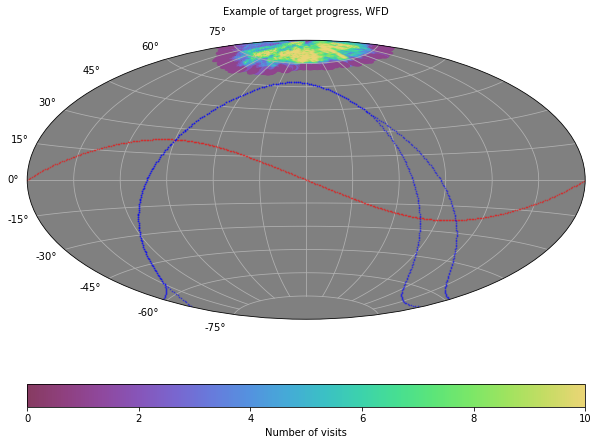

In [8]:
bundle.plot(plotFunc=plots.BaseSkyMap(),savefig=True)
# g.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 0 and night <= 69 for columns ['altitude', 'azimuth', 'fieldRA']
Found 38546 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 0 and night <= 69" constraint now.


/home/tiago/lsst/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/tiago/lsst/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.


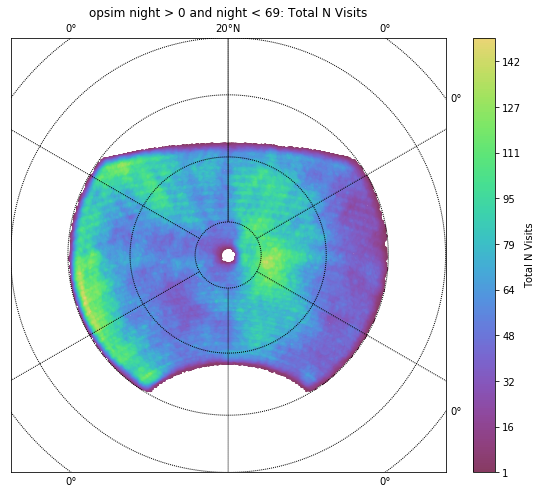

In [79]:
slicer = slicers.HealpixSlicer(latCol='zenithDistance', lonCol='azimuth')
plotFuncs=[plots.LambertSkyMap()]
plotDict = {'figsize':(10, 8),'colorMin':0, 'colorMax': 30 } #, 'xMin':0, 'xMax':10}
plotDict = {'figsize':(10, 8)} #, 'xMin':0, 'xMax':10}

bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = mb.MetricBundleGroup({0:bundle}, o)
bg.runAll()
bg.plotAll(closefigs=False)

In [27]:
plotDict = {'figsize':(10, 8),'colorMin':0, 'colorMax': 30, 'xMin':0, 'xMax':20}
for i in range(7):
    sql = 'night > %i and night <= %i' % (i, i+1)
    bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)
    bdict = mb.makeBundlesDictFromList([bundle])
    bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
    bg = mb.MetricBundleGroup({0:bundle}, o)
    bg.runAll()
    bg.plotAll(savefig=True,outfileSuffix='_night%02i' % (i+1),closefigs=True)   

Querying database SummaryAllProps with constraint night > 0 and night <= 1 for columns ['fieldRA', 'azimuth', 'altitude']
Found 373 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 0 and night <= 1" constraint now.


/home/tiago/lsst/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/tiago/lsst/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.
Querying database SummaryAllProps with constraint night > 1 and night <= 2 for columns ['fieldRA', 'azimuth', 'altitude']
Found 326 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 1 and night <= 2" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night > 2 and night <= 3 for columns ['fieldRA', 'azimuth', 'altitude']
Found 218 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 2 and night <= 3" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night > 3 and night <= 4 for columns ['fieldRA', 'azimuth', 'altitude']
Found 732 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 3 and night <= 4" constraint now.
Plotting comp

/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint night > 4 and night <= 5
  warnings.warn('No data matching constraint %s' % constraint)
/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:265: UserWarning:  This means skipping metrics ['Total N Visits : night > 4 and night < 5 : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)
/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:527: UserWarning: MetricBundle (opsim_Total_N_Visits_night_gt_4_and_night_lt_5_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint night > 5 and night <= 6
  warnings.warn('No data matching constraint %s' % constraint)
/home/tiago/l

Plotting complete.
Querying database SummaryAllProps with constraint night > 6 and night <= 7 for columns ['fieldRA', 'azimuth', 'altitude']
Plotting figures with "night > 6 and night <= 7" constraint now.
Plotting complete.


/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:261: UserWarning: No data matching constraint night > 6 and night <= 7
  warnings.warn('No data matching constraint %s' % constraint)
/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:265: UserWarning:  This means skipping metrics ['Total N Visits : night > 6 and night < 7 : HealpixSlicer']
  warnings.warn(' This means skipping metrics %s' % metricsSkipped)
/home/tiago/lsstRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:527: UserWarning: MetricBundle (opsim_Total_N_Visits_night_gt_6_and_night_lt_7_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


In [34]:
print(d)

[ (   1, 1,  59853.01803241,  305.47180803,    0.      , -50.87289 , 'z',  44.99839397)
 (   2, 1,  59853.01847222,  305.63057487,  355.272187, -50.801194, 'z',  48.06476669)
 (   3, 1,  59853.01892361,  305.79351978,  350.566309, -50.583341, 'z',  51.12598241)
 ...,
 (4230, 7,  59859.38834491,   85.06318978,  100.984094, -36.910032, 'r',  75.18229028)
 (4231, 7,  59859.3887963 ,   85.2261347 ,  104.379733, -38.6541  , 'r',  72.15732552)
 (4232, 7,  59859.38925926,   85.39325768,   94.61139 , -35.441678, 'r',  80.68005562)]


In [36]:
night = 1
sql = 'night == %i' % (night)
d = o.query_columns('SummaryAllProps', colnames=['observationId', 'night', 
                                                 'observationStartMJD', 'observationStartLST', 'fieldRA', 
                                                 'fieldDec','filter','altitude'], 
                    sqlconstraint=sql)

for obsId in d['observationId']:
    sql = 'night == %i and observationId <= %i' % (night, obsId)
    bundle = mb.MetricBundle(m, s, sql, summaryMetrics=[metrics.SumMetric()], plotDict=plotDict, plotFuncs=plotFuncs)
    bdict = mb.makeBundlesDictFromList([bundle])
    bundle = mb.MetricBundle(m, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
    bg = mb.MetricBundleGroup({0:bundle}, o)
    bg.runAll()
    bg.plotAll(savefig=True,outfileSuffix='_observation%02i' % (obsId),closefigs=True)

Querying database SummaryAllProps with constraint night == 1 and observationId <= 1 for columns ['azimuth', 'fieldRA', 'altitude']
Found 1 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 1" constraint now.


/home/tiago/lsst/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/tiago/lsst/python/miniconda3-4.3.21/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 2 for columns ['azimuth', 'fieldRA', 'altitude']
Found 2 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 2" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 3 for columns ['azimuth', 'fieldRA', 'altitude']
Found 3 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 3" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 4 for columns ['azimuth', 'fieldRA', 'altitude']
Found 4 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and o

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 26 for columns ['azimuth', 'fieldRA', 'altitude']
Found 26 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 26" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 27 for columns ['azimuth', 'fieldRA', 'altitude']
Found 27 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 27" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 28 for columns ['azimuth', 'fieldRA', 'altitude']
Found 28 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night ==

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 50 for columns ['azimuth', 'fieldRA', 'altitude']
Found 50 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 50" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 51 for columns ['azimuth', 'fieldRA', 'altitude']
Found 51 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 51" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 52 for columns ['azimuth', 'fieldRA', 'altitude']
Found 52 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night ==

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 74 for columns ['azimuth', 'fieldRA', 'altitude']
Found 74 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 74" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 75 for columns ['azimuth', 'fieldRA', 'altitude']
Found 75 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 75" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 76 for columns ['azimuth', 'fieldRA', 'altitude']
Found 76 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night ==

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 98 for columns ['azimuth', 'fieldRA', 'altitude']
Found 98 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 98" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 99 for columns ['azimuth', 'fieldRA', 'altitude']
Found 99 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 99" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 100 for columns ['azimuth', 'fieldRA', 'altitude']
Found 100 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night 

Found 121 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 121" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 122 for columns ['azimuth', 'fieldRA', 'altitude']
Found 122 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 122" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 123 for columns ['azimuth', 'fieldRA', 'altitude']
Found 123 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 123" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 145 for columns ['azimuth', 'fieldRA', 'altitude']
Found 145 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 145" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 146 for columns ['azimuth', 'fieldRA', 'altitude']
Found 146 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 146" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 147 for columns ['azimuth', 'fieldRA', 'altitude']
Found 147 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "

Found 168 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 168" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 169 for columns ['azimuth', 'fieldRA', 'altitude']
Found 169 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 169" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 170 for columns ['azimuth', 'fieldRA', 'altitude']
Found 170 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 170" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 192 for columns ['azimuth', 'fieldRA', 'altitude']
Found 192 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 192" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 193 for columns ['azimuth', 'fieldRA', 'altitude']
Found 193 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 193" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 194 for columns ['azimuth', 'fieldRA', 'altitude']
Found 194 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "

Found 215 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 215" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 216 for columns ['azimuth', 'fieldRA', 'altitude']
Found 216 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 216" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 217 for columns ['azimuth', 'fieldRA', 'altitude']
Found 217 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 217" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 239 for columns ['azimuth', 'fieldRA', 'altitude']
Found 239 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 239" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 240 for columns ['azimuth', 'fieldRA', 'altitude']
Found 240 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 240" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 241 for columns ['azimuth', 'fieldRA', 'altitude']
Found 241 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "

Found 262 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 262" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 263 for columns ['azimuth', 'fieldRA', 'altitude']
Found 263 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 263" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 264 for columns ['azimuth', 'fieldRA', 'altitude']
Found 264 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 264" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 286 for columns ['azimuth', 'fieldRA', 'altitude']
Found 286 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 286" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 287 for columns ['azimuth', 'fieldRA', 'altitude']
Found 287 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 287" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 288 for columns ['azimuth', 'fieldRA', 'altitude']
Found 288 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "

Found 309 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 309" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 310 for columns ['azimuth', 'fieldRA', 'altitude']
Found 310 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 310" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 311 for columns ['azimuth', 'fieldRA', 'altitude']
Found 311 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 311" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <

Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 333 for columns ['azimuth', 'fieldRA', 'altitude']
Found 333 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 333" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 334 for columns ['azimuth', 'fieldRA', 'altitude']
Found 334 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 334" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 335 for columns ['azimuth', 'fieldRA', 'altitude']
Found 335 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "

Found 356 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 356" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 357 for columns ['azimuth', 'fieldRA', 'altitude']
Found 357 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 357" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <= 358 for columns ['azimuth', 'fieldRA', 'altitude']
Found 358 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night == 1 and observationId <= 358" constraint now.
Plotting complete.
Querying database SummaryAllProps with constraint night == 1 and observationId <